# From Statistical Physics to Data-Driven Modelling with Applications to Quantitative Biology
Tutorial 8 : Hidden Markov Models for CG content variations in viral genomes.

This tutorial is based on the Chapter 3 of the book:
     R. Durbin, S. Eddy, A. Krogh, G. Mitchison, Biological sequence analysis, Cambridge University Press 2007. 

Solution Notebook SC RM FZ.

In [1]:
#Information, Inference Networks: Tutorial 6.  S.C., R.M., F.Z.
#Hidden Markov Model
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import numpy.matlib
%matplotlib inline
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["figure.figsize"] = (10, 8)
#plt.rcParams["font.size"] = 26

import numpy.linalg as LA
from numpy.linalg import inv

In [2]:
#Function to convert the basis letters into integer numbers from 1 to 4 
def letter2number(a): 
    
    switcher = {
        'a': 1,
        'c': 2,
        'g': 3,
        't': 4,
    }
    return switcher.get(a,0)

Read Lambda phage genome

In [3]:
# Read a Sequence data and return a sequence of  numbers
# Open the file and write a list containing all lines. Join them.
data=open('../Data/lambdaphage.txt', 'r')
phageread1 = data.readlines()
phageread2 = ''.join(phageread1)
data.close()
# Convert the letters into numbers from 0 to 3
seq = []
for i in range(len(phageread2)):
    y = letter2number(phageread2[i])
    if (y!=0):
        seq.append(y-1)
L=len(seq)
print(L)

48502


Define Emission probabilities for AT and GC rich regions

In [10]:
E=np.zeros((2,4))
E[0,:]=np.array([0.2700,0.2084,0.1981,0.3235])   #type 0 is AT-rich
E[1,:]=np.array([0.2462,0.2476,0.2985,0.2077])   #type 1 is CG-rich


[[0.27   0.2084 0.1981 0.3235]
 [0.2462 0.2476 0.2985 0.2077]] 
 [-0.09227775  0.17235523  0.40999798 -0.44310438]


Question 2: Decide the type (AT or GC rich) of a sequence by using Bayesian inference, guess the type for the the first and second halves of the genome

In [19]:
#Differences of the log-probabilities between the 2 models for each nucleotide 
beta = np.log(E[1,:]/E[0,:])
print(E,'\n',beta)

[[0.27   0.2084 0.1981 0.3235]
 [0.2462 0.2476 0.2985 0.2077]] 
 [-0.09227775  0.17235523  0.40999798 -0.44310438]


In [20]:
def decide_type (y,beta):
    R=0
    for i in range(len(y)):
        R+=beta[y[i]]
    d=int(R>0)
    return d

In [22]:
#Question 2: result for the first and second halves of the genome
print(decide_type(seq[0:int(L/2)],beta),decide_type(seq[int(L/2):],beta))

1 0


Question 3: Compute the average CG content of a sequence.

In [13]:
#Function which compute the average GC content
def CGcontent (y):
    w=np.copy(y)
    return (np.size(np.where(w==1))+ np.size(np.where(w==2)))/np.size(w)

Question 5: Implement the Viterbi algorithm.

In [23]:
#Question 5: Viterbi algorithm
#define transition probabilities between hidden states; here r(x,x')=Omega(x->x')
r=np.zeros((2,2))
r[0,0]=0.9998
r[1,1]=0.9998
r[0,1]=0.0002
r[1,0]=0.0002
#Forward Propagation Viterbi Algorithm
#find x(i) and lp(i) by maximising over the two hidden states in i+1
#value of the loglikelihood maximised over all hidden units except the ith-hidden state
vp=-np.log(2)*np.ones(2)
vptmp=np.zeros(2)
# most probable ith hidden unit value as a function of the hidden state i+1 
xp=np.zeros((L,2)).astype(int)
for i in range (L-1):
    for x in range(2):
        lp=vp+np.log(E[:,seq[i]])+np.log(r[:,x])
        vptmp[x]=np.amax(lp)
        xp[i,x]=np.argmax(lp)
    vp=np.copy(vptmp)
#overall log-prob of the sequence
lp=vp+np.log(E[:,seq[L-1]])
vplast=np.amax(lp)
xf=np.zeros(L).astype(int)
#most probable hidden variable for the last base
xf[L-1]=np.argmax(lp)
#Backpropagation to find the most probable sequence of hidden states
for i in range(L-2,-1,-1):
    xf[i]=xp[i,xf[i+1]]


Questions 4 and 5. Plot the decision and the average CG content on a width k.

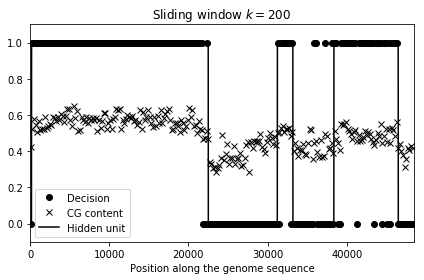

In [27]:
#Plot the decision and the average CG content on a width k
k=200
w=range(0,L-k,k)
xplot=[]
y1=[]
y2=[]
for i in w:
    xplot.append(i+k/2)
    y1.append(decide_type(seq[i:i+k],beta))
    y2.append(CGcontent(seq[i:i+k]))
xx=range(0,L)
c1,=plt.plot(xplot,y1,'ko',label='Decision')
c2,=plt.plot(xplot,y2,'kx',label='CG content ')
c3,=plt.plot(xx,xf,'k',label='Hidden unit')
plt.legend (handles=[c1,c2,c3],loc=3)
plt.title("Sliding window $k=200$")
plt.xlabel("Position along the genome sequence")
plt.xlim([0,L])
plt.ylim([-0.1,1.1])
#plt.text(0, 1.12, 'A', fontweight='bold')
plt.tight_layout()
#plt.savefig('HMMlambdaseq_200.pdf')
plt.show()